# Environnement & Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-8-358864a12876>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Chargement Dataset


In [9]:
data = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

C:\Users\matth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,52,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
#data_orig = data.copy()

In [11]:
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:p

In [12]:
data.shape

(1703814, 184)

In [13]:
data.dtypes

code                                          object 
url                                           object 
creator                                       object 
created_t                                     int64  
created_datetime                              object 
last_modified_t                               int64  
last_modified_datetime                        object 
product_name                                  object 
abbreviated_product_name                      object 
generic_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
packaging_text                                object 
brands                                        object 
brands_tags                                   object 
categories                                    object 
categories_tags                               object 
categories_en               

In [14]:
data.shape

(1703814, 184)

# Contrôle des colonnes

In [15]:
#liste_colonnes = data.columns.tolist()

In [16]:
def control_columns(dataframe):
    '''Fonction qui contrôle si les colonnes du dataframe à cleaner correspondent\
bien à ce qui est attendu'''
    
    liste_colonnes = ['code', 
                      'url', 
                      'creator', 
                      'created_t', 
                      'created_datetime', 
                      'last_modified_t', 
                      'last_modified_datetime', 
                      'product_name', 
                      'abbreviated_product_name',
                      'generic_name', 
                      'quantity', 
                      'packaging', 
                      'packaging_tags',
                      'packaging_text',
                      'brands', 
                      'brands_tags', 
                      'categories', 
                      'categories_tags', 
                      'categories_en', 
                      'origins', 
                      'origins_tags',
                      'origins_en',
                      'manufacturing_places', 
                      'manufacturing_places_tags', 
                      'labels',
                      'labels_tags',
                      'labels_en',
                      'emb_codes',
                      'emb_codes_tags',
                      'first_packaging_code_geo',
                      'cities',
                      'cities_tags',
                      'purchase_places',
                      'stores',
                      'countries',
                      'countries_tags',
                      'countries_en',
                      'ingredients_text',
                      'allergens',
                      'allergens_en',
                      'traces',
                      'traces_tags',
                      'traces_en',
                      'serving_size',
                      'serving_quantity',
                      'no_nutriments',
                      'additives_n',
                      'additives',
                      'additives_tags',
                      'additives_en',
                      'ingredients_from_palm_oil_n',
                      'ingredients_from_palm_oil',
                      'ingredients_from_palm_oil_tags',
                      'ingredients_that_may_be_from_palm_oil_n',
                      'ingredients_that_may_be_from_palm_oil',
                      'ingredients_that_may_be_from_palm_oil_tags',
                      'nutriscore_score',
                      'nutriscore_grade',
                      'nova_group', 
                      'pnns_groups_1', 
                      'pnns_groups_2',
                      'states',
                      'states_tags',
                      'states_en',
                      'brand_owner',
                      'main_category',
                      'main_category_en',
                      'image_url',
                      'image_small_url',
                      'image_ingredients_url',
                      'image_ingredients_small_url', 
                      'image_nutrition_url',
                      'image_nutrition_small_url',
                      'energy-kj_100g',
                      'energy-kcal_100g',
                      'energy_100g',
                      'energy-from-fat_100g',
                      'fat_100g',
                      'saturated-fat_100g',
                      '-butyric-acid_100g',
                      '-caproic-acid_100g', 
                      '-caprylic-acid_100g',
                      '-capric-acid_100g',
                      '-lauric-acid_100g', 
                      '-myristic-acid_100g',
                      '-palmitic-acid_100g',
                      '-stearic-acid_100g',
                      '-arachidic-acid_100g', 
                      '-behenic-acid_100g',
                      '-lignoceric-acid_100g', 
                      '-cerotic-acid_100g',
                      '-montanic-acid_100g',
                      '-melissic-acid_100g', 
                      'monounsaturated-fat_100g',
                      'polyunsaturated-fat_100g',
                      'omega-3-fat_100g',
                      '-alpha-linolenic-acid_100g',
                      '-eicosapentaenoic-acid_100g',
                      '-docosahexaenoic-acid_100g',
                      'omega-6-fat_100g',
                      '-linoleic-acid_100g',
                      '-arachidonic-acid_100g',
                      '-gamma-linolenic-acid_100g',
                      '-dihomo-gamma-linolenic-acid_100g',
                      'omega-9-fat_100g',
                      '-oleic-acid_100g',
                      '-elaidic-acid_100g',
                      '-gondoic-acid_100g',
                      '-mead-acid_100g',
                      '-erucic-acid_100g',
                      '-nervonic-acid_100g',
                      'trans-fat_100g',
                      'cholesterol_100g',
                      'carbohydrates_100g',
                      'sugars_100g',
                      '-sucrose_100g',
                      '-glucose_100g',
                      '-fructose_100g',
                      '-lactose_100g',
                      '-maltose_100g',
                      '-maltodextrins_100g',
                      'starch_100g', 
                      'polyols_100g',
                      'fiber_100g',
                      '-soluble-fiber_100g',
                      '-insoluble-fiber_100g',
                      'proteins_100g',
                      'casein_100g',
                      'serum-proteins_100g',
                      'nucleotides_100g',
                      'salt_100g',
                      'sodium_100g',
                      'alcohol_100g',
                      'vitamin-a_100g',
                      'beta-carotene_100g',
                      'vitamin-d_100g',
                      'vitamin-e_100g',
                      'vitamin-k_100g',
                      'vitamin-c_100g',
                      'vitamin-b1_100g',
                      'vitamin-b2_100g',
                      'vitamin-pp_100g',
                      'vitamin-b6_100g',
                      'vitamin-b9_100g',
                      'folates_100g',
                      'vitamin-b12_100g',
                      'biotin_100g',
                      'pantothenic-acid_100g',
                      'silica_100g',
                      'bicarbonate_100g',
                      'potassium_100g',
                      'chloride_100g',
                      'calcium_100g',
                      'phosphorus_100g',
                      'iron_100g',
                      'magnesium_100g',
                      'zinc_100g',
                      'copper_100g',
                      'manganese_100g',
                      'fluoride_100g',
                      'selenium_100g',
                      'chromium_100g',
                      'molybdenum_100g',
                      'iodine_100g',
                      'caffeine_100g',
                      'taurine_100g',
                      'ph_100g',
                      'fruits-vegetables-nuts_100g',
                      'fruits-vegetables-nuts-dried_100g',
                      'fruits-vegetables-nuts-estimate_100g',
                      'collagen-meat-protein-ratio_100g',
                      'cocoa_100g',
                      'chlorophyl_100g',
                      'carbon-footprint_100g',
                      'carbon-footprint-from-meat-or-fish_100g',
                      'nutrition-score-fr_100g',
                      'nutrition-score-uk_100g',
                      'glycemic-index_100g',
                      'water-hardness_100g',
                      'choline_100g',
                      'phylloquinone_100g',
                      'beta-glucan_100g',
                      'inositol_100g',
                      'carnitine_100g']
    
    error = 0
    for column in liste_colonnes:
        try :
            dataframe[column]
        except:
            print('il manque la colonne {} dans le jeu de données'.format(column))
            error += 1
    
    if error > 0 :
        print('Erreur : jeu de données non chargé, il manque {} colonne(s) \
dans le jeu de données'.format(error))
        return False
    
    
    elif dataframe.shape[1] != len(liste_colonnes):
        print('il y a des colonnes en trop dans le jeu de données :')
        print(set(dataframe.columns.tolist()) - set(liste_colonnes))
        return False
    
    else:
        return True

# Nettoyage types

In [17]:
def nettoyage_types(dataframe):
    '''Corrige les types pour les colonnes dont les résultats sont des booléens'''
    try :
        #booleans
        bool_columns = ['ingredients_that_may_be_from_palm_oil']
        for column in bool_columns:
            dataframe[column] = dataframe[column].astype('bool')

        #ints
        int_columns = []
        for column in int_columns:
            dataframe[column] = dataframe[column].astype('int64')

        #floats
        float_columns = ['cities', 'allergens_en', 'serving_quantity', 'no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g', '-maltose_100g', '-maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g']
        for column in float_columns:
            dataframe[column] = dataframe[column].astype('float64')

        #objects
        object_columns = ['code', 'url', 'cities', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives', 'additives_tags', 'additives_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url']
        for column in object_columns:
            dataframe[column] = dataframe[column].astype('object')

        #categories
        categories_columns = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'nova_group']
        for column in categories_columns:
            dataframe[column] = dataframe[column].astype('category')


        #pour les datetime, voir paragraphe de nettoyage suivant
    except:
        print('Erreur de conversion de type, vérifiez les colonnes')
        
    return dataframe

# Format timestamp des colonnes

In [18]:
#Observation des colonnes qui contiennent le _t et le _datetime
print(data.iloc[:,data.columns.str.endswith('_t')].head())
print('\n', data.iloc[:,data.columns.str.endswith('_datetime')].head())

    created_t  last_modified_t
0  1529059080  1561463718     
1  1539464774  1539464817     
2  1574175736  1574175737     
3  1444572561  1444659212     
4  1560020173  1560020173     

        created_datetime last_modified_datetime
0  2018-06-15T10:38:00Z  2019-06-25T11:55:18Z 
1  2018-10-13T21:06:14Z  2018-10-13T21:06:57Z 
2  2019-11-19T15:02:16Z  2019-11-19T15:02:17Z 
3  2015-10-11T14:09:21Z  2015-10-12T14:13:32Z 
4  2019-06-08T18:56:13Z  2019-06-08T18:56:13Z 


In [19]:
from datetime import datetime
import time

def clean_datetime(dataframe):
    '''Fonction pour transformer les colonnes de suffixe _t & _datetime en 
    format timestamp et renommer les colonnes'''
    columns = dataframe.columns
    columns_treated = []
    for column in columns:
        if column[-2:] == '_t':
            new_column = column[:-2]
            dataframe[new_column] = pd.to_datetime(dataframe[column], 
                                                   unit='s') 
            dataframe = dataframe.drop(column, axis=1)
            
        #elif str(column).endswith("_datetime"):
        #    new_column = column[:-9]
        #    dataframe[new_column] = dataframe[column]\
        #    .apply(pd.to_datetime, infer_datetime_format = True, format = "%Y-%m-%dT%h:%M:%s")
        #    columns_treated.append(new_column)
            
        #else:
        #    columns_treated.append(column)
            
    return dataframe

# Traitement des colonnes "Tags"
# Pays d'origine

In [20]:
def categorize(chaine, mapping):
    group = 'autre'
    for key in mapping:
        if key in str(chaine):
            group = mapping[key]
            break
    return group

def traitement_tags(dataframe):

    #packaging_tags
    mapping = {'plastique' : 'plastique',
                            'kunststoff' : 'plastique',
                            'sachet' : 'plastique',
                            'verre' : 'verre',
                            'carton' : 'carton',
                            'plastique' : 'plastique',
                            'conserve' : 'conserve'}

    dataframe['packaging_tags'] = dataframe['packaging_tags'].apply(categorize, args=[mapping])
    dataframe['packaging_tags'] = dataframe['packaging_tags'].astype('category')
    #print(dataframe['packaging_tags'].unique())
    
    #brands_tags
    mapping = {'carrefour' : 'carrefour',
          'auchan' : 'auchan',
          'leader-price' : 'leader-price',
          'delhaize' : 'delhaize',
          'casino' : 'casino',
          'nestle' : 'nestle',
          'cora' : 'cora',
          'hacendado' : 'hacendado'}
    dataframe['brands_tags'] = dataframe['brands_tags'].apply(categorize, args=[mapping])
    dataframe['brands_tags'] =dataframe['brands_tags'].astype('category')
    #print(dataframe['brands_tags'].unique())
    
    

    #categories_tags
    #mapping = {''}
    #dataframe[''] = dataframe[''].apply(categorize)
    #dataframe.drop([''], axis=1, inplace=True)
    
    #origins_tags
    mapping = {'france' : 'france',
              'italie' : 'italie',
              'belgique' : 'belgique',
              'deutschland' : 'allemagne',
              'suisse' : 'suisse',
              'allemagne' : 'allemagne',
              'mexico' : 'mexique',
              'espana' : 'espagne'}
    dataframe['origins_tags'] = dataframe['origins_tags'].apply(categorize, args=[mapping])
    dataframe['origins_tags'] = dataframe['origins_tags'].astype('category')
    #print(dataframe['origins_tags'].unique())

    
    #manufacturing_places_tags
    mapping = {'france': 'france',
          'italie': 'italie',
          'belgique':'belgique',
          'deutschland' : 'allemagne',
          'suisse':'suisse',
          'allemagne' : 'allemagne',
          'mexico' : 'mexique',
           'espana' : 'espagne',
           'espagne' : 'espagne'
          }
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].apply(categorize, args=[mapping])
    dataframe['manufacturing_places_tags'] = dataframe['manufacturing_places_tags'].astype('category')
    #print(dataframe['manufacturing_places_tags'].unique())

               
    #labels_tags
    mapping = {'organic' : 'bio',
           'gluten-free' : 'sans gluten',
           'biologique' : 'bio',
            'green-dot' : 'recyclable',
           'vegan' : 'vegan',
           'vegetarian' : 'vegetarien',
           'france' : 'made in france',
           'no-preservatives' : 'sans conservateur',
           'no-colorings' : 'sans colorants',
           'no-added-sugar' : 'sans sucre ajouté'
          }
    dataframe['labels_tags'] = dataframe['labels_tags'].apply(categorize, args=[mapping])
    dataframe['labels_tags'] = dataframe['labels_tags'].astype('category')
    #print(dataframe['labels_tags'].unique())
    
               
    #emb_codes_tags : à supprimer / pas de patern
    dataframe.drop(['emb_codes_tags'], axis=1, inplace=True)
    
    #cities_tags : pas de traitement à réaliser
    
    #countries_tags
    mapping = {'france': 'france'}
    dataframe['countries_tags'] = dataframe['countries_tags'].apply(categorize, args=[mapping])
    dataframe['countries_tags'] = dataframe['countries_tags'].astype('category')
    #print(dataframe['countries_tags'].unique())
    
        
    #traces_tags
    mapping = {'nuts' : 'arachides',
           'milk' : 'lait',
           'gluten' : 'gluten',
           'soybeans' : 'graines de soja',
           'peanuts' : 'arachides',
          'eggs' : 'oeufs'}
    dataframe['traces_tags'] = dataframe['traces_tags'].apply(categorize, args=[mapping])
    dataframe['traces_tags'] = dataframe['traces_tags'].astype('category')
    #print(dataframe['traces_tags'].unique())
    
    
    #additives_tags
    mapping = {'en:e330' : 'E330',
               'en:e322' : 'E322/E322I',
               'en:e322i' : 'E322/E322I',
               'en:e440' : 'E440/E440I' ,
               'en:e440i' : 'E440/E440I',
               'en:e415' : 'E415',
               'en:e300' : 'E300',
               'en:e14xx' : 'E14XX',
               'en:e407' : 'E407',
               'en:E250' : 'E250',
               'en:E316' : 'E316'}
    dataframe['additives_tags'] = dataframe['additives_tags'].apply(categorize, args=[mapping])
    dataframe['additives_tags'] = dataframe['additives_tags'].astype('category')
    #print(dataframe['additives_tags'].unique())
    
      
               
    #ingredients_from_palm_oil_tags
    mapping = {'huile-de-palme' : 'huile-de-palme',
           'e304-palmitate-d-ascorbyle' : 'E304',
           'palme' : 'huile-de-palme'}
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_from_palm_oil_tags'] = dataframe['ingredients_from_palm_oil_tags'].astype('category')
    #print(dataframe['ingredients_from_palm_oil_tags'].unique())
     
      
               
    #ingredients_that_may_be_from_palm_oil_tags
    mapping = {'e471-mono-et-diglycerides-d-acides-gras-alimentaires' : 'E471',
           'huile végétale' : 'huile végétale',
           'e160a-beta-carotene' : 'e160a-beta-carotene',
           'e433-monooleate-de-polyoxyethylene-de-sorbitane' : 'E433',
           'e472e-ester-monoacethyltartrique-de-mono-et-diglycerides-d-acides-gras' : 'E472',
           'e471-mono-et-diglycerides-d-acides-gras-alimentaires,e481-stearoyl-2-lactylate-de-sodium' : 'E471'}
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].apply(categorize, args=[mapping])
    dataframe['ingredients_that_may_be_from_palm_oil_tags'] = dataframe['ingredients_that_may_be_from_palm_oil_tags'].astype('category')
    #print(dataframe['ingredients_that_may_be_from_palm_oil_tags'].unique())
    
    
    #'states_tags' - n'apporte pas d'information, peut être supprimée
    dataframe = dataframe.drop(['states_tags'], axis=1)
    
    
    return dataframe

In [21]:
data.countries.unique().tolist()

['France',
 'en:es',
 'en:France',
 'en:france',
 'en:fr',
 'United States',
 'Irlande',
 'en:FR',
 nan,
 'en:be',
 'United Kingdom',
 'États-Unis, en:france',
 'France, United States',
 'France,États-Unis',
 'Spain',
 'en:Ivory Coast',
 'Canada',
 'España',
 'Allemagne',
 'Suisse',
 'en:it',
 'Germany',
 'France,Belgique',
 'Belgium',
 'France, États-Unis',
 'Pérou',
 'en:germany',
 'Schweiz',
 'Oman',
 'Deutschland',
 'Slovenia',
 'en:DE',
 'en:de',
 'Frankreich, Deutschland',
 'France,Germany,Netherlands',
 'en:KW',
 'ફ્રાન્સ',
 'en:spain',
 'France,Switzerland',
 'Frankreich, en:de',
 'France, en:de',
 'Italy',
 'Romania',
 'en:US',
 'Australia',
 'en:lu',
 'en:Spain',
 'en:United Arab Emirates',
 'en:Italy',
 'Portugal',
 'en:us',
 'en:Dominican Republic',
 'en:RE',
 'Espagne',
 'en:Canada',
 'United Kingdom,en:united-kingdom',
 'Israel',
 'en:CH',
 'en:Netherlands',
 'us',
 'Royaume-Uni',
 'Belgique,France',
 'en:United States',
 'en:ca',
 'en:Saudi Arabia',
 'en:pl',
 'en:gb',
 

In [22]:
def tri_pays(dataframe):
    '''Réduction du dataframe à la France'''
    liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']
    dataframe = dataframe.drop(['nutrition-score-uk_100g'],axis=1)    
    return dataframe[dataframe['countries'].isin(liste_pays)]

# Suppression des colonnes contenant trop de NaN

In [23]:
def print_control_shape_nan(dataframe):
        print('........Proportion de NaN : {} %, Taille du jeu de données : {}\n'
              .format(round(dataframe.isna().sum().sum()/dataframe.shape[0]/dataframe.shape[1],2)*100,
                      dataframe.shape))

In [24]:
data['energy_100g'].isna().sum()/data['energy_100g'].shape[0]

0.20573431137436363

In [25]:
#nan_quantity = (data.shape[0] - data.isna().sum())/data.shape[0]

In [26]:
#meaning_columns = nan_quantity[nan_quantity>0.01].index.tolist()

In [27]:
def clean_nan(dataframe, taux_nan_max) :
    '''Nettoyage des faux "nan" en "NaN et Suppression des colonnes ayant 
    moins de valeurs que le taux de rétention.
    Renvoie en sortie la dataframe sans les colonnes non conservées'''
    
    #remplacement des "faux NaN" en NaN reconnus par pandas
    dataframe = dataframe.replace(to_replace = '^nan$', value = np.nan, regex=True)
    
    non_nan_quantity = (dataframe.shape[0] - dataframe.isna().sum())/dataframe.shape[0]
    
    nb_NaN = dataframe.shape[1]
    
    dataframe = dataframe[non_nan_quantity[non_nan_quantity > 1- taux_nan_max].index.tolist()]
    
    nb_NaN = nb_NaN - dataframe.shape[1]
    
    print('Nombre de colonnes supprimées :', nb_NaN)
    
    return dataframe

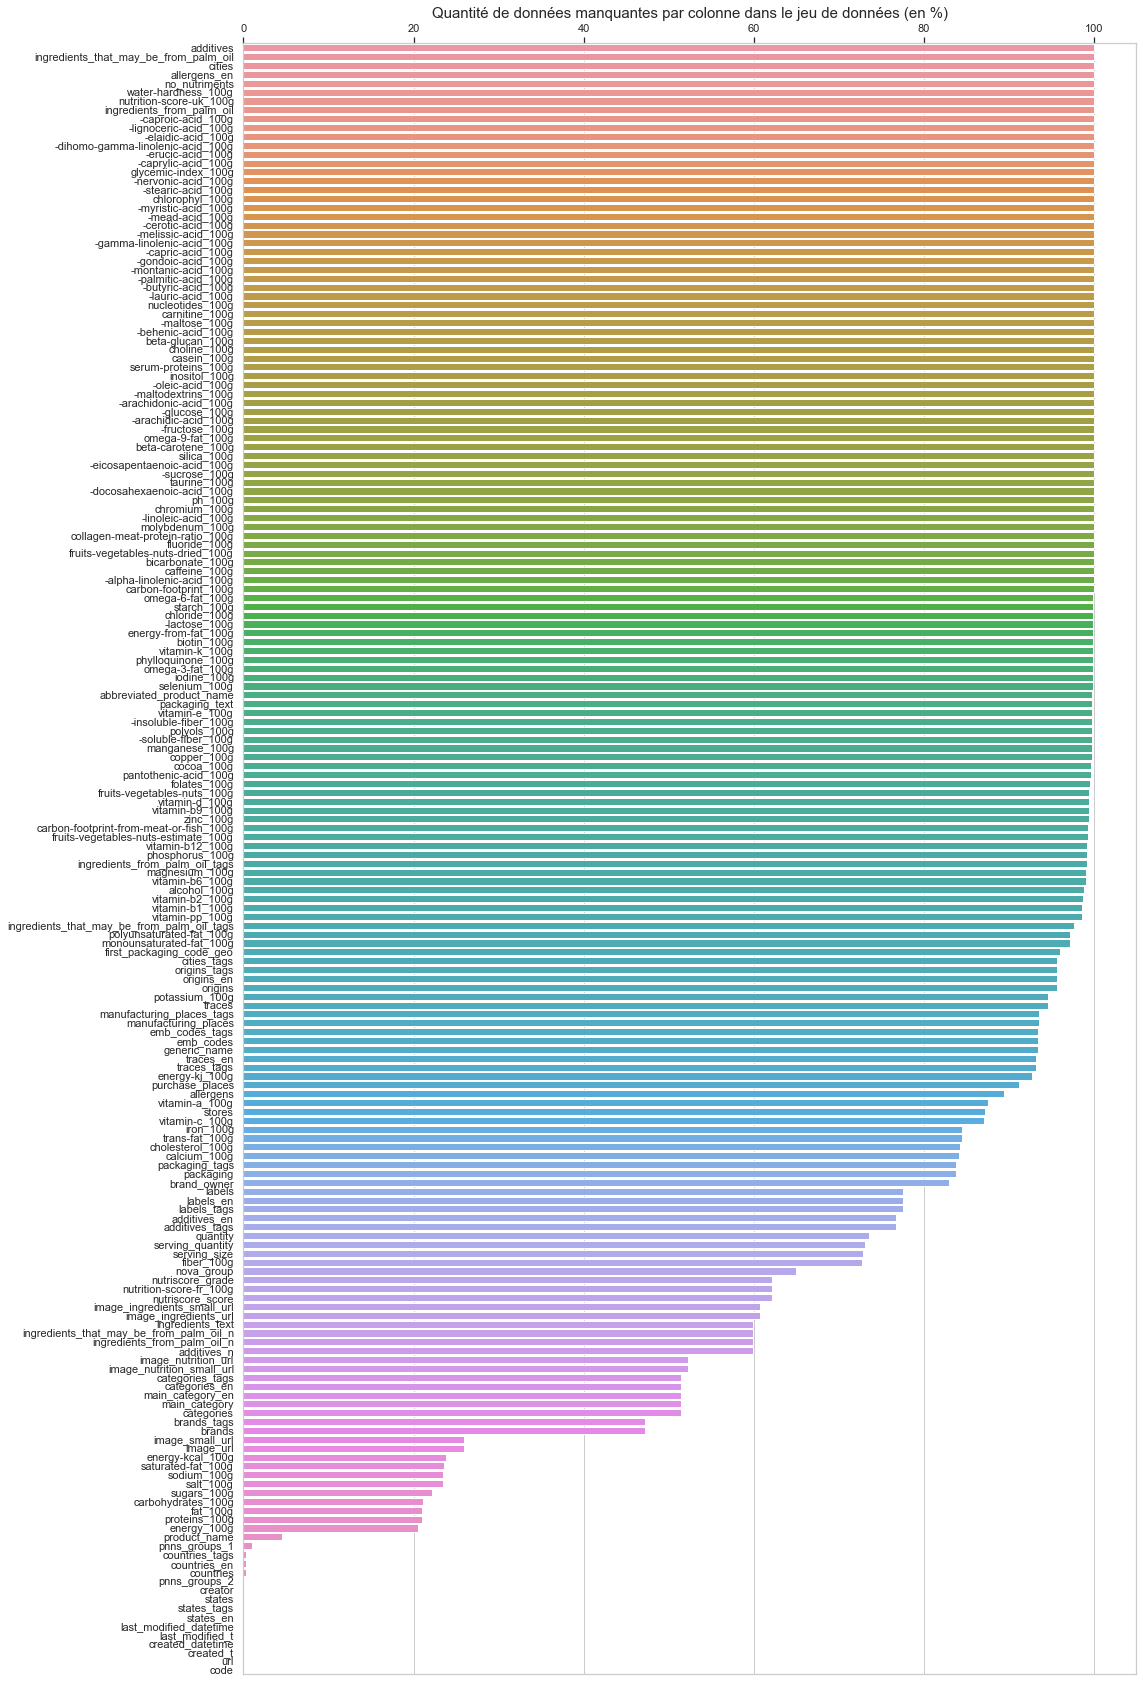

In [28]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

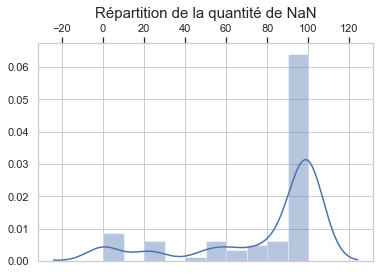

In [29]:
sns.set(style="whitegrid")
ax = sns.distplot(proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN', size=15)
plt.show()

# Traitement des outliers

# Intuitions

In [30]:
def delete_outliers_std(dataframe):
    '''Suppression des outliers trop éloignés de la moyenne'''
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        
        dataframe.loc[dataframe[column] > dataframe[column].mean() + 2 * dataframe[column].std()] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].mean() - 2 * dataframe[column].std()] = np.nan
        dataframe.loc[dataframe[column] < 0] = np.nan
        
    return dataframe
    
def delete_outliers_percentiles(dataframe):
    '''Suppression des outliers du centile extrême'''
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)] = np.nan
        dataframe.loc[dataframe[column] < 0] = np.nan
    return dataframe

In [31]:
salt_std = delete_outliers_std(data.copy()[['energy_100g','salt_100g']])['salt_100g']
salt_percentiles = delete_outliers_percentiles(data.copy()[['energy_100g','salt_100g']])['salt_100g']

In [32]:
print('Moyenne de salt_100g : ',data['salt_100g'].mean())
print('Ecart type de salt_100g : ',data['salt_100g'].std())

Moyenne de salt_100g :  1.9815056712495698
Ecart type de salt_100g :  110.29563772558888


Text(0.5, 1.0, 'Méthode par percentiles')

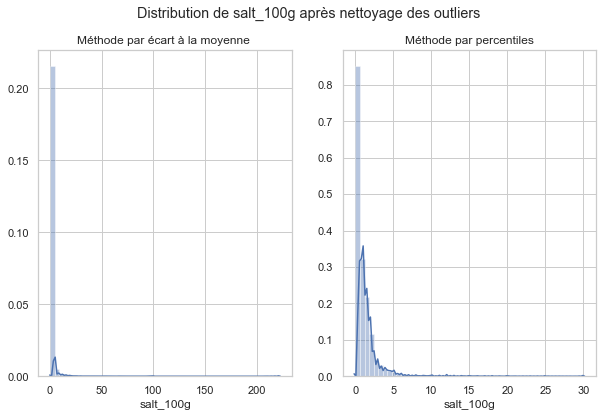

In [33]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de salt_100g après nettoyage des outliers")
ax1 = sns.distplot(salt_std.dropna(), ax=axes[0])
ax1.set_title("Méthode par écart à la moyenne ")
ax2 = sns.distplot(salt_percentiles.dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

In [34]:
outliers_std = pd.concat([salt_std, data['salt_100g']]).drop_duplicates(keep=False)
outliers_percentiles = pd.concat([salt_percentiles, data['salt_100g']]).drop_duplicates(keep=False)

In [35]:
print(outliers_std.shape)
print(outliers_percentiles.shape)

(276,)
(1007,)


# Fonction

In [36]:
from sklearn.neighbors import KDTree


def delete_univariate_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    suppression des données négatives et des valeurs supérieures à 100 g pour les indices ramenés à 100 g'''
    #valeurs extremes
    
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        index_nan = []
        index_nan_flat = []
        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < 0].index.tolist())
        if (column[-5:] == '_100g') & (column != 'energy_100g'):
            index_nan.append(dataframe.loc[dataframe[column] > 100].index.tolist())
            
        for sublist in index_nan:
            for item in sublist:
                index_nan_flat.append(item)
                
        #suppression des doublons
        index_nan_flat = list(dict.fromkeys(index_nan_flat))
        dataframe[column].loc[index_nan_flat] = np.nan
            

    print_control_shape_nan(dataframe)
            
    return dataframe

def delete_multivariate_outliers(dataframe):
    '''Suppression des outliers éloignés de leurs plus proches voisins (discrimination du centile 
    le plus éloigné par la distance de minkowski de chaque observation à ses 3 plus proches voisins)'''

    numeric_data = dataframe.select_dtypes(['int32', 'float64']).copy().dropna(axis=0).dropna(axis=1)
    print_control_shape_nan(dataframe)
    try:
        kdt = KDTree(numeric_data, leaf_size = 40, metric='minkowski')
        dist, ind = kdt.query(numeric_data, k=3, return_distance=True)
    
        numeric_data['3N_distance'] = np.sum(dist, axis=1)    
        numeric_data = numeric_data[numeric_data['3N_distance'] < numeric_data['3N_distance'].quantile(0.99)]
        index_to_drop = numeric_data.index.tolist()
        dataframe = dataframe.drop(index_to_drop, axis=0)
    except ValueError:
        print('.........oops : trop de NaN dans le jeu de données, calcul de distance impossible')

    
    print_control_shape_nan(dataframe)
    
    return dataframe

def delete_outliers(dataframe):
    print('........Suppression des outliers univariés')
    dataframe = delete_univariate_outliers(dataframe)
    print('........Suppression des outliers multivariés')
    dataframe = delete_multivariate_outliers(dataframe)
    return dataframe

In [37]:
a = clean_nan(data.head(10000).copy(), taux_nan_max = 0.80)

Nombre de colonnes supprimées : 129


In [38]:
delete_multivariate_outliers(a)

........Proportion de NaN : 27.0 %, Taille du jeu de données : (10000, 55)

........Proportion de NaN : 37.0 %, Taille du jeu de données : (6598, 55)



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,375.0,1569.0,7.0,3.08,NaN,NaN,70.10,15.00,NaN,7.80,1.400,0.560,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded",NaN,NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,

# Fonction

In [39]:
def impute_knn(dataframe):
    '''Imputation des NaN de variables numériques par la méthodes des K plus proches voisins'''
    numeric_columns = dataframe.select_dtypes(['int32','float64']).columns
    imputable_columns = dataframe.select_dtypes(['int32', 'float64','category'])
    print('shape imputable columns : ', imputable_columns.shape)
    for column in imputable_columns:
        print('\n...imputation colonne ', column)
        #on identifie les indices des données manquantes pour la colonne du tour de boucle
        index_to_fill = dataframe[dataframe[column].isna()].index
        #on stocke le nombre de NaN pour comparer leur nombre avant et après le traitement
        nb_nan = dataframe[column].isna().sum()
        if nb_nan != 0 :
            #on détermine les colonnes pour lesquelles on va calculer les distances
            columns_to_calculate = dataframe[numeric_columns].iloc[index_to_fill[0],:].dropna().index.tolist() 
            #on calcule le KDTree sur la base des données des autres colonnes, après suppression de TOUS les NaN
            tree = KDTree(dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), leaf_size=2)
            print('...arbre calculé')
            #on détermine les distances/indices aux 10 plus proches voisins de tous les points du jeu de donnée
            dist, ind = tree.query(dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), k=10)
            print('...dimensions {}/indice {}calculés : '.format(dist.shape, ind.shape))
            print('index to fill : ', index_to_fill)
            #pour chaque point où on a des données manquantes, on impute la moyenne des 10 plus proches voisins 
            break
            for i, x in enumerate(index_to_fill):
                #pour les donnnées catégorielles, on attribue selon la valeur la plus fréquente
                if pd.api.types.is_categorical_dtype(dataframe[column]):
                    vote = dataframe.iloc[ind[i,:], dataframe.columns.get_loc(column)].value_counts().reset_index().iloc[0,0]
                    dataframe.iloc[x,dataframe.columns.get_loc(column)] = vote
                    
                #pour les données numériques, on attribue selon la moyenne des valeurs les plus proches
                elif pd.api.types.is_numeric_dtype(dataframe[column]):
                    mean = dataframe.iloc[ind[i,:], dataframe.columns.get_loc(column)].mean()
                    dataframe.iloc[x,dataframe.columns.get_loc(column)] = mean
                else:
                    print('Type inconnu {}, colonne {} non traitée'.format(dataframe[column].dtype, column))

        print('Colonne {} traitée, {} NaN initialement, {} NaN après imputation'.format(column, nb_nan, dataframe[column].isna().sum()))
    try:
        dataframe['nova_group'] = dataframe['nova_group'].round()
    except:
        print('colonne nova_group absente')
    return dataframe

# Observation de l'application de la fonction d'imputation sur une partie du jeu de données

In [40]:
data_test = impute_knn(clean_nan(data.head(10000),0.80))

Nombre de colonnes supprimées : 129
shape imputable columns :  (10000, 23)

...imputation colonne  serving_quantity
...arbre calculé
...dimensions (7067, 10)/indice (7067, 10)calculés : 
index to fill :  Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9900, 9916, 9924, 9926, 9939, 9946, 9959, 9968, 9971, 9989],
           dtype='int64', length=3169)


In [41]:
data_test.select_dtypes(['int32','float64', 'category']).isna().sum().sum()

74518


Traitement de la variable  energy_100g
Moyenne (Avant / Après) :  1178.7839703  /  1195.2290262609902
Ecart-Type (Avant / Après) :  944.0372979949145  /  959.4941235311196

Traitement de la variable  fiber_100g
Moyenne (Avant / Après) :  2.768681655311394  /  2.9377450258979874
Ecart-Type (Avant / Après) :  4.693678617401355  /  4.49904184345504

Traitement de la variable  calcium_100g
Moyenne (Avant / Après) :  0.09275106000000166  /  0.100283719120794
Ecart-Type (Avant / Après) :  0.19390461970523015  /  0.1974596554898322

Traitement de la variable  iron_100g
Moyenne (Avant / Après) :  0.0034077025000000113  /  0.0017466069005621242
Ecart-Type (Avant / Après) :  0.13418071764633163  /  0.003122622484025627


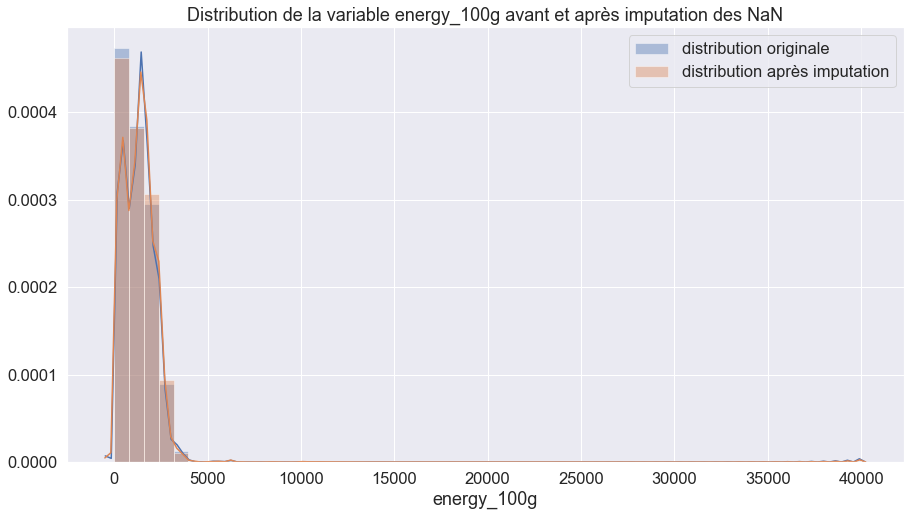

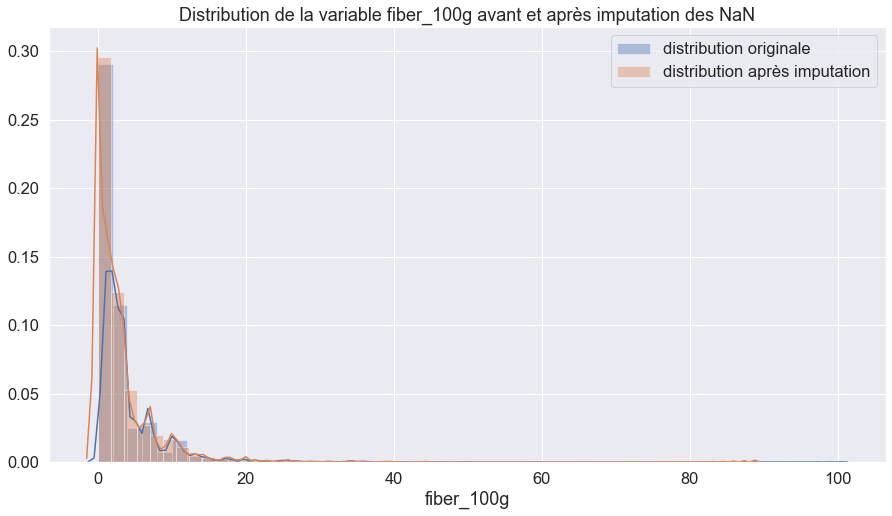

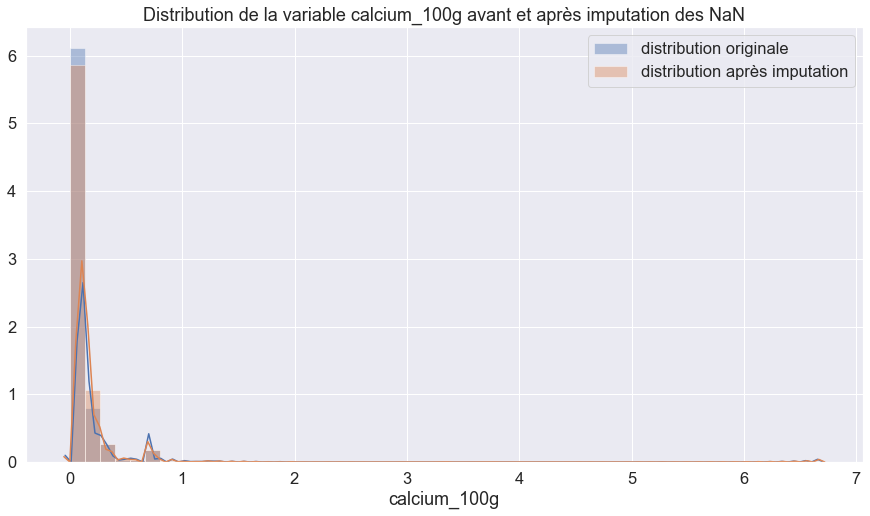

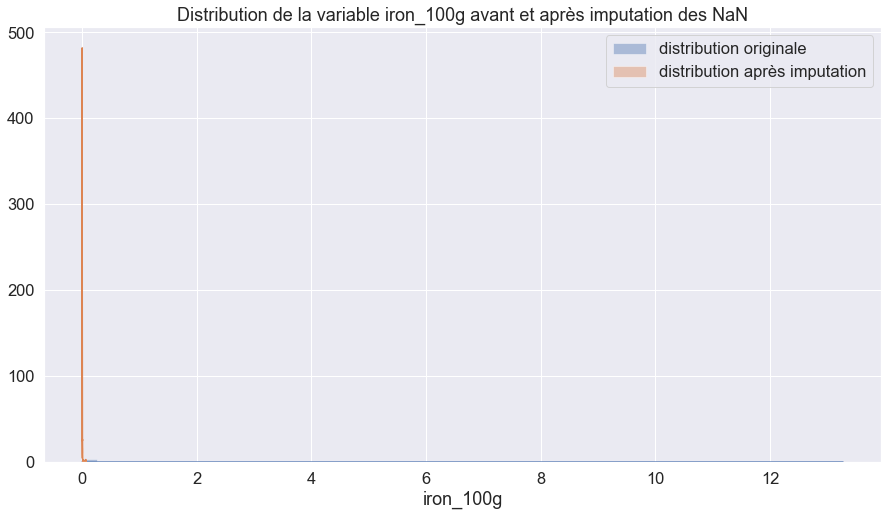

In [42]:
sns.set(font_scale=1.5)
for column in ['energy_100g', 'fiber_100g', 'calcium_100g', 'iron_100g']:
    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(data[column].dropna().head(10000))
    sns.distplot(data_test[column].dropna())
    plt.legend(['distribution originale', 'distribution après imputation'])
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', data[column].dropna().head(10000).mean(), ' / ', data_test[column].mean())
    print('Ecart-Type (Avant / Après) : ', data[column].dropna().head(10000).std(), ' / ', data_test[column].std())
sns.set(font_scale=2)

In [43]:
print('dernier centile : ',data['calcium_100g'].dropna().head(10000).quantile(0.99))
print('écart type avant imputation :', data['calcium_100g'].dropna().head(10000)[data[column] < 0.861].std())
print('écart type après imputation :', data_test['calcium_100g'][data_test['calcium_100g'] < 0.861].std())

dernier centile :  0.789
écart type avant imputation : 0.17072965620759717
écart type après imputation : 0.13351805055918184


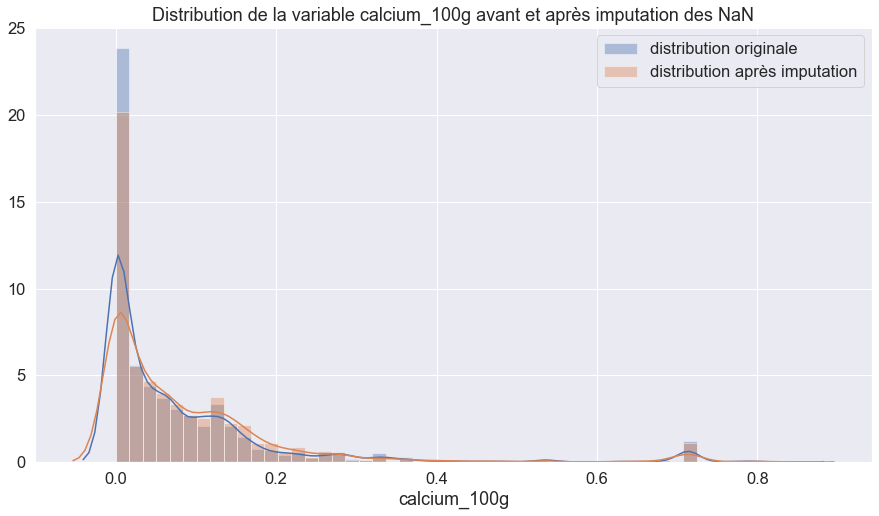

In [44]:
sns.set(font_scale=1.5)
for column in ['calcium_100g']:
    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(data[column].dropna().head(10000)[data[column] < 0.861])
    sns.distplot(data_test[column][data_test[column] < 0.861])
    plt.legend(['distribution originale', 'distribution après imputation'])
sns.set(font_scale=1)

In [45]:
data_test['nova_group'].value_counts()

4.0    4951
3.0    877 
1.0    638 
2.0    124 
Name: nova_group, dtype: int64

In [46]:
clean_nan(data.head(10000),0.80)['nova_group'].value_counts()

Nombre de colonnes supprimées : 129


4.0    4951
3.0    877 
1.0    638 
2.0    124 
Name: nova_group, dtype: int64

Nombre de colonnes supprimées : 129
Nombre de colonnes supprimées : 129


Text(0.5, 1.0, 'Nova Group column\nAfter imputation')

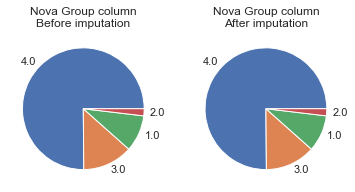

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(clean_nan(data.head(10000),0.80)['nova_group'].value_counts(), 
              labels = clean_nan(data.head(10000),0.80)['nova_group'].value_counts().index)
ax1.set_title('Nova Group column\nBefore imputation')

ax2.pie(data_test['nova_group'].round().value_counts(), 
              labels = data_test['nova_group'].round().value_counts().index)
ax2.set_title('Nova Group column\nAfter imputation')

# Suppression des colonnes contenant de l'information en doublon

In [48]:
#data[['countries_en', 'countries']]

In [49]:
columns_to_delete = ['countries']

In [50]:
# data_echantillon[['last_modified_datetime', 'last_modified_t']]

In [51]:
# data_echantillon[['created_datetime', 'created_t']]

In [52]:
#data.dtypes

In [53]:
def remove_columns(dataframe) :
    colonnes = dataframe.columns.tolist()
    columns_to_delete = ['countries', 'countries_tags', 'last_modified_datetime', 'created_datetime', 
                         'main_category','brands_tags','labels',
                         'labels_en', 'categories_tags', 'categories_en', 
                        'serving_size', 'additives_en', 'traces', 'states','states_en', 'countries_en']
    for column in columns_to_delete:
        try:
            colonnes.remove(column)
        except:
            print('........colonne non présente : ', column)
    print('\n')
    return dataframe[colonnes]

# Nettoyage tirets dans titre des colonnes

In [54]:
def clean_column_names(dataframe):
    '''Fonction pour retirer les tirets dans les noms de colonnes pour avoir 
    la même mise en forme pour chaque colonne'''
    columns = dataframe.columns
    columns_treated = []
    for column in columns:
        if column[0] == '-':
            column = column[1:]
        columns_treated.append(column)
    dataframe.columns = columns_treated
    return dataframe

In [55]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_t

# Application des traitements de nettoyage au dataset entier

# Fonction de nettoyage

In [56]:
import datetime
def complete_cleaning(dataframe):
    '''Application de toutes les fonctions de nettoyage vues précédemment'''
    
    #controle des colonnes du dataset
    if control_columns(dataframe) is True :
               
        #Nettoyage types de données
        print('\n', datetime.datetime.now(),' - nettoyage des types\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try : 
            dataframe = nettoyage_types(dataframe)
        except Exception as e: 
            print(e)
            print('erreur dans le nettoyage')
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        #format des dates
        print('\n', datetime.datetime.now(),' - Mise en conformité du format des dates\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = clean_datetime(dataframe)
        except Exception as e: 
            print(e)
            print('Erreur dans la mise en conformité des dates')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        
        #traitement des tags
        print(datetime.datetime.now(),' - Traitement des tags\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = traitement_tags(dataframe)
        except Exception as e: 
            print(e)
            print('Erreur dans le traitement des tags')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
            
            
        #réduction du dataset à la France / suppression nutriscore UK
        print('\n', datetime.datetime.now(),' - Réduction du dataset à la France\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try :
            dataframe = tri_pays(dataframe)
        except Exception as e: 
            print(e)
            print('........erreur dans la réduction du dataset')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)   
            
            
        #nettoyage des colonnes avec trop de NaN
        print(datetime.datetime.now(),' - Nettoyage des colonnes contenant plus de 20 % de NaN\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = clean_nan(dataframe, taux_nan_max = 0.80)
        except Exception as e: 
            print(e)
            print('........Erreur dans le nettoyage des colonnes contenant trop de NaN')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
         
        #traitement des outliers
        print('\n', datetime.datetime.now(),' - Traitement des outliers\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = delete_outliers(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des outliers\n')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        

        #imputation des NaN
        print('\n', datetime.datetime.now(),' - Imputation des NaN par méthodes des kNN\n...')
        try:
            #dataframe = impute_knn(dataframe)
            print('........Traitement non appliqué par défaut (besoin en mémoire trop important.')
            print('........Un exemple de son application est visible dans le paragraphe dédié à l\'imputation ')
            print('........présenté dans ce notebook\n...')
        except Exception as e: 
            print(e)
            print('.........Erreur dans l\'imputation des NaN\n...')
        print_control_shape_nan(dataframe)
        
        #suppression des colonnes en doublon
        print(datetime.datetime.now(),' - Suppression des colonnes en doublon\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try:
            dataframe = remove_columns(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des colonnes inutiles')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
                
        #nettoyage des tirets dans les titres de colonnes:
        print('\n', datetime.datetime.now(),' - Nettoyage des titres de colonnes\n...')
        colonnes_pre_traitement = dataframe.columns.tolist()
        try :
            dataframe = clean_column_names(dataframe)
        except Exception as e: 
            print(e)
            print('.........Erreur dans le nettoyage des titres')
        #print('nombre de colonnes : ,', len(dataframe.columns))
        #print('colonnes supprimées : ,', (set(colonnes_pre_traitement) - set(dataframe.columns.tolist())))       
        print_control_shape_nan(dataframe)
        
        
        print('\n', datetime.datetime.now(),' - Nettoyage des données effectué avec succès')

    else:
        print('\n', datetime.datetime.now(),' - Jeu de données non nettoyé')
        
    return dataframe

In [57]:
data_to_clean_cleaned = complete_cleaning(data.copy())


 2021-04-25 18:06:33.255384  - nettoyage des types
...
Erreur de conversion de type, vérifiez les colonnes
........Proportion de NaN : 79.0 %, Taille du jeu de données : (1703814, 184)


 2021-04-25 18:06:40.579029  - Mise en conformité du format des dates
...
........Proportion de NaN : 79.0 %, Taille du jeu de données : (1703814, 184)

2021-04-25 18:06:54.948930  - Traitement des tags
...
........Proportion de NaN : 75.0 %, Taille du jeu de données : (1703814, 182)


 2021-04-25 18:07:31.786810  - Réduction du dataset à la France
...
........Proportion de NaN : 75.0 %, Taille du jeu de données : (642256, 181)

2021-04-25 18:07:35.403406  - Nettoyage des colonnes contenant plus de 20 % de NaN
...
Nombre de colonnes supprimées : 123
........Proportion de NaN : 27.0 %, Taille du jeu de données : (642256, 58)


 2021-04-25 18:08:11.205361  - Traitement des outliers
...
........Suppression des outliers univariés
........Proportion de NaN : 28.000000000000004 %, Taille du jeu de données :

In [58]:
data_to_clean_cleaned.head(5)

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
3,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,moutarde au moût de raisin,100g,NaN,autre,courte paille,"Epicerie, Condiments, Sauces, Moutardes",autre,autre,made in france,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),autre,0.0,autre,0.0,autre,0.0,1.0,autre,18.0,d,NaN,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0,2015-10-11 14:09:21,2015-10-12 14:13:32
4,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,Xsf,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
5,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06


# Taille du jeu final comparée à la taille du jeu initial

In [59]:
taille_jeux = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, 
                                           data_to_clean_cleaned.shape],
                           
                            'Proportion de NaN (en %)' :
                            [data.isna().sum().sum()/data.shape[0]/data.shape[1]*100,
                             data_to_clean_cleaned.isna().sum().sum()/
                             data_to_clean_cleaned.shape[0] / 
                             data_to_clean_cleaned.shape[1]*100]
                           })

In [60]:
taille_jeux

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(1703814, 184)",79.489873
1,données nettoyées,"(627815, 45)",29.814045


# Export du fichier CSV

In [163]:
data_to_clean_cleaned.to_csv('en.openfoodfacts.org.products_cleaned2.csv', index=False)

In [164]:
res = data_to_clean_cleaned.dtypes.to_frame('dtypes').reset_index()
types = res.to_csv('dtypes.csv', index=False)